In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split , cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder , OneHotEncoder
from sklearn.feature_selection import SelectKBest , chi2
from sklearn.metrics import accuracy_score , classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

In [3]:
df_fake = pd.read_csv(r"C:\Users\user\OneDrive\Documents\fake.csv")
df_true = pd.read_csv(r"C:\Users\user\OneDrive\Documents\true.csv")

In [5]:
df_fake

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"
...,...,...,...,...
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016"
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016"
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016"
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016"


In [7]:
df_true

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"
...,...,...,...,...
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017"
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017"
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017"
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017"


In [9]:
df_fake['class'] = 'Fake'
df_fake

,title,text,subject,date,class
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",Fake
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",Fake
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",Fake
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",Fake
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",Fake
...,...,...,...,...,...
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016",Fake
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016",Fake
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016",Fake
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016",Fake


In [11]:
df_true['class'] = 'True'
df_true

,title,text,subject,date,class
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",True
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",True
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",True
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",True
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",True
...,...,...,...,...,...
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017",True
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017",True
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017",True
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017",True


In [13]:
df_fake.shape

(23481, 5)

In [15]:
df_true.shape

(21417, 5)

In [17]:
data = pd.concat([df_fake,df_true], ignore_index=True)
print(data.shape)

(44898, 5)


In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44898 entries, 0 to 44897
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    44898 non-null  object
 1   text     44898 non-null  object
 2   subject  44898 non-null  object
 3   date     44898 non-null  object
 4   class    44898 non-null  object
dtypes: object(5)
memory usage: 1.7+ MB


In [21]:
data.describe()

,title,text,subject,date,class
count,44898,44898,44898,44898,44898
unique,38729,38646,8,2397,2
top,Factbox: Trump fills top jobs for his administ...,,politicsNews,"December 20, 2017",Fake
freq,14,627,11272,182,23481


In [23]:
data.head(10)

,title,text,subject,date,class
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",Fake
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",Fake
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",Fake
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",Fake
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",Fake
5,Racist Alabama Cops Brutalize Black Boy While...,The number of cases of cops brutalizing and ki...,News,"December 25, 2017",Fake
6,"Fresh Off The Golf Course, Trump Lashes Out A...",Donald Trump spent a good portion of his day a...,News,"December 23, 2017",Fake
7,Trump Said Some INSANELY Racist Stuff Inside ...,In the wake of yet another court decision that...,News,"December 23, 2017",Fake
8,Former CIA Director Slams Trump Over UN Bully...,Many people have raised the alarm regarding th...,News,"December 22, 2017",Fake
9,WATCH: Brand-New Pro-Trump Ad Features So Muc...,Just when you might have thought we d get a br...,News,"December 21, 2017",Fake


In [25]:
data.tail(10)

,title,text,subject,date,class
44888,"Mata Pires, owner of embattled Brazil builder ...","SAO PAULO (Reuters) - Cesar Mata Pires, the ow...",worldnews,"August 22, 2017",True
44889,"U.S., North Korea clash at U.N. forum over nuc...",GENEVA (Reuters) - North Korea and the United ...,worldnews,"August 22, 2017",True
44890,"U.S., North Korea clash at U.N. arms forum on ...",GENEVA (Reuters) - North Korea and the United ...,worldnews,"August 22, 2017",True
44891,Headless torso could belong to submarine journ...,COPENHAGEN (Reuters) - Danish police said on T...,worldnews,"August 22, 2017",True
44892,North Korea shipments to Syria chemical arms a...,UNITED NATIONS (Reuters) - Two North Korean sh...,worldnews,"August 21, 2017",True
44893,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017",True
44894,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017",True
44895,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017",True
44896,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017",True
44897,Indonesia to buy $1.14 billion worth of Russia...,JAKARTA (Reuters) - Indonesia will buy 11 Sukh...,worldnews,"August 22, 2017",True


In [27]:
attributes = data.columns[:-1]
attributes

Index(['title', 'text', 'subject', 'date'], dtype='object')

In [29]:
print(data.isnull().sum())

title      0
text       0
subject    0
date       0
class      0
dtype: int64


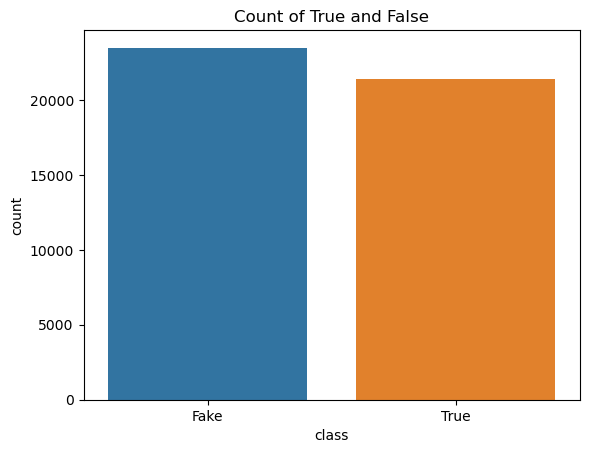

In [31]:
sns.countplot( x = 'class' , data = data)
plt.title("Count of True and False")
plt.show()

C:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


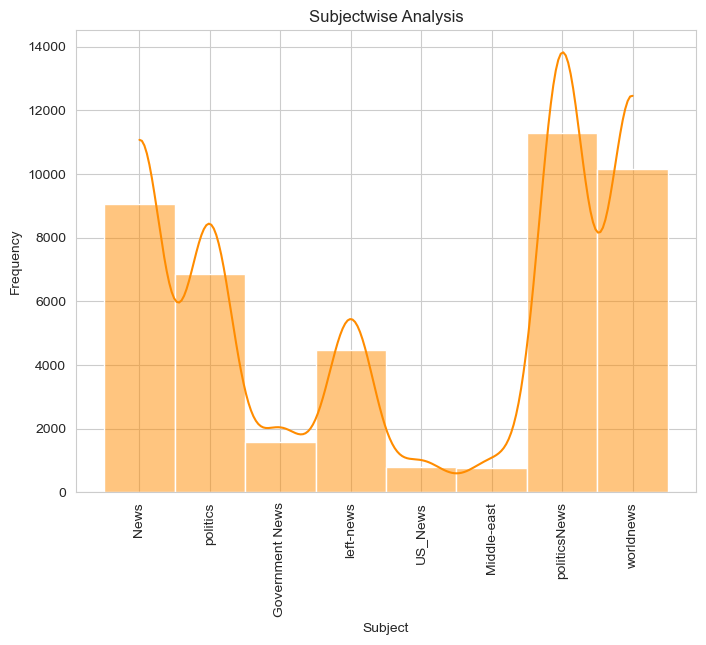

In [33]:
sns.set_style("whitegrid")
plt.figure(figsize = (8,6))
sns.histplot(data['subject'], kde = True , color = 'darkorange' , bins =10)
plt.title("Subjectwise Analysis")
plt.xlabel("Subject")
plt.xticks(rotation = 90)
plt.ylabel("Frequency")
plt.show()

C:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


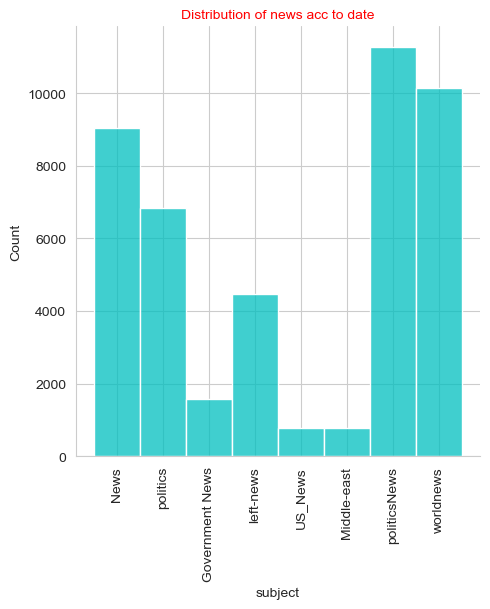

In [35]:
sns.displot(data.subject, color ='c')
plt.xticks(rotation=90)
plt.title("Distribution of news acc to date", fontsize =10, color ='r')
plt.show()

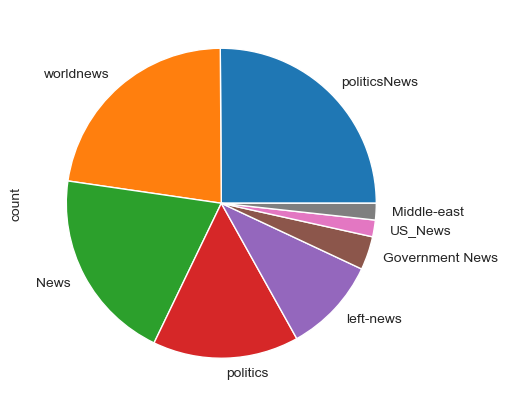

In [37]:
plt.figure(figsize =[5,10])
data["subject"].value_counts().plot.pie()
plt.show()

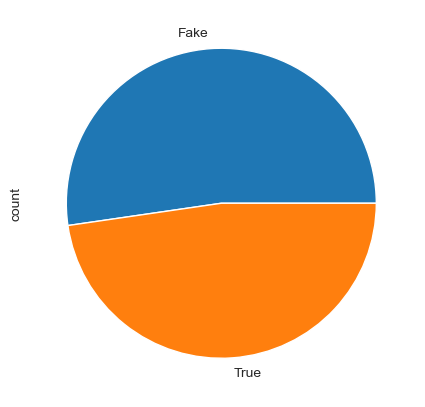

In [39]:
plt.figure(figsize =[5,10])
data["class"].value_counts().plot.pie()
plt.show()

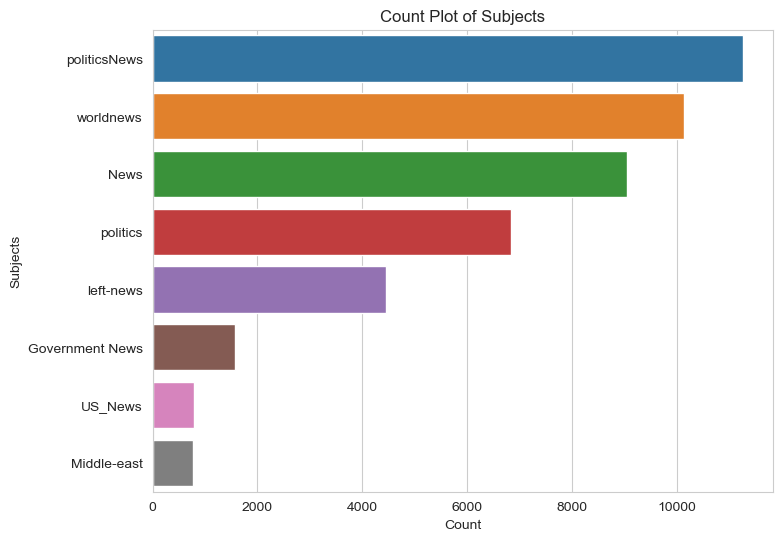

In [41]:
plt.figure(figsize = (8,6))
sns.countplot(y = 'subject', data = data , order = data['subject'].value_counts().index)
plt.title("Count Plot of Subjects")
plt.xlabel('Count')
plt.ylabel('Subjects')
plt.show()

In [43]:
data.duplicated().sum()

209

In [45]:
data.drop_duplicates(inplace=True)

<Axes: >

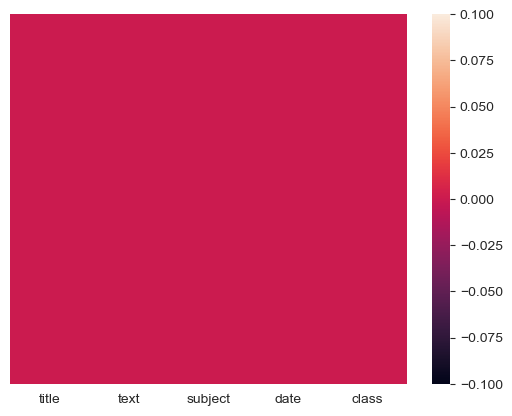

In [47]:
sns.heatmap(data.isnull(),annot=False,yticklabels=False)

In [49]:
cat = data.groupby("subject")['class'].value_counts().reset_index()
print(cat.head())
print(cat.tail())

           subject class  count
0  Government News  Fake   1570
1      Middle-east  Fake    778
2             News  Fake   9050
3          US_News  Fake    783
4        left-news  Fake   4459
        subject class  count
3       US_News  Fake    783
4     left-news  Fake   4459
5      politics  Fake   6838
6  politicsNews  True  11220
7     worldnews  True   9991


In [51]:
data['date'] = pd.to_datetime(data['date'], format='mixed', dayfirst=True, errors='coerce')
data['date'].head()

0   2017-12-31
1   2017-12-31
2   2017-12-30
3   2017-12-29
4   2017-12-25
Name: date, dtype: datetime64[ns]

In [53]:
df = data.drop(["title", "subject","date",], axis = 1)

In [55]:
df.isnull().sum()

text     0
class    0
dtype: int64

In [57]:
df = df.sample(frac = 1)

In [59]:
df.head()

,text,class
32038,NEW YORK/WASHINGTON (Reuters) - Three senior o...,True
42066,BERLIN (Reuters) - The premier of Germany s mo...,True
4730,When Ella Dawson started a blog discussing her...,Fake
11916,Madonna took to Instagram late Thursday to pro...,Fake
34626,(Reuters) - Atlantic City Mayor Don Guardian o...,True


In [61]:
x = df["text"]
y = df["class"]

In [63]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25)

In [65]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorization = TfidfVectorizer()
xv_train = vectorization.fit_transform(x_train)
xv_test = vectorization.transform(x_test)

In [66]:
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression()
LR.fit(xv_train,y_train)

LogisticRegression()

In [69]:
pred_lr=LR.predict(xv_test)

In [71]:
LR.score(xv_test, y_test)

0.9861272710999731

In [73]:
print(classification_report(y_test, pred_lr))

              precision    recall  f1-score   support

        Fake       0.99      0.99      0.99      5908
        True       0.98      0.99      0.99      5265

    accuracy                           0.99     11173
   macro avg       0.99      0.99      0.99     11173
weighted avg       0.99      0.99      0.99     11173



In [75]:
from sklearn.tree import DecisionTreeClassifier

DT = DecisionTreeClassifier()
DT.fit(xv_train, y_train)

DecisionTreeClassifier()

In [77]:
pred_dt = DT.predict(xv_test)

In [79]:
DT.score(xv_test, y_test)

0.996330439452251

In [81]:
print(classification_report(y_test, pred_dt))

              precision    recall  f1-score   support

        Fake       0.99      1.00      1.00      5908
        True       1.00      0.99      1.00      5265

    accuracy                           1.00     11173
   macro avg       1.00      1.00      1.00     11173
weighted avg       1.00      1.00      1.00     11173



In [83]:
from sklearn.ensemble import GradientBoostingClassifier

GBC = GradientBoostingClassifier(random_state=0)
GBC.fit(xv_train, y_train)


GradientBoostingClassifier(random_state=0)

In [84]:
pred_gbc = GBC.predict(xv_test)

In [85]:
GBC.score(xv_test, y_test)

0.9956144276380561

In [86]:
print(classification_report(y_test, pred_gbc))

              precision    recall  f1-score   support

        Fake       1.00      0.99      1.00      5908
        True       0.99      1.00      1.00      5265

    accuracy                           1.00     11173
   macro avg       1.00      1.00      1.00     11173
weighted avg       1.00      1.00      1.00     11173



In [87]:
from sklearn.ensemble import RandomForestClassifier

RFC = RandomForestClassifier(random_state=0)
RFC.fit(xv_train, y_train)

RandomForestClassifier(random_state=0)

In [88]:
pred_rfc = RFC.predict(xv_test)

In [89]:
RFC.score(xv_test, y_test)

0.9863957755302962

In [90]:
print(classification_report(y_test, pred_rfc))

              precision    recall  f1-score   support

        Fake       0.99      0.99      0.99      5908
        True       0.99      0.98      0.99      5265

    accuracy                           0.99     11173
   macro avg       0.99      0.99      0.99     11173
weighted avg       0.99      0.99      0.99     11173



In [91]:
def output_lable(n):
    if n == 'Fake':
        return "Fake News"
    elif n == 'True':
        return "Not A Fake News"
    
def manual_testing(news):
    testing_news = {"text":[news]}
    new_def_test = pd.DataFrame(testing_news)
    new_def_test["text"] = new_def_test["text"].apply(wordopt) 
    new_x_test = new_def_test["text"]
    new_xv_test = vectorization.transform(new_x_test)
    pred_LR = LR.predict(new_xv_test)
    pred_DT = DT.predict(new_xv_test)
    pred_GBC = GBC.predict(new_xv_test)
    pred_RFC = RFC.predict(new_xv_test)

    return print("\n\nLR Prediction: {} \nDT Prediction: {} \nGBC Prediction: {} \nRFC Prediction: {}".format(output_lable(pred_LR['Fake']),       
                                                                                                              output_lable(pred_DT['Fake']), 
                                                                                                              output_lable(pred_GBC['Fake']), 
                                                                                                              output_lable(pred_RFC['Fake'])))

In [ ]:
news = str(input())
manual_testing(news)

In [ ]:
news = str(input())
manual_testing(news)